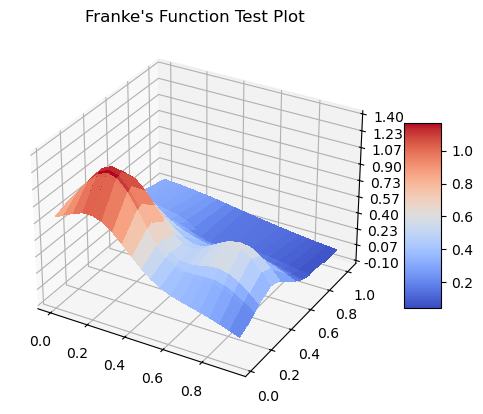

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from random import random, seed
import numpy as np
from imageio.v2 import imread
from numpy.random import normal, uniform
import sklearn.metrics as error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn import linear_model

def frankes_function(x, y):
    z = ((3/4)*np.exp((-1/4)*(9*x-2)**2-(1/4)*(9*y-2)**2)
        + ((3/4)*np.exp((-1/49)*(9*x+1)**2-(1/10)*(9*y+1)))
        + ((1/2)*np.exp((-1/4)*(9*x-7)**2-(1/4)*(9*y-3)**2))
        - ((1/5)*np.exp(-(9*x-4)**2-(9*y-7)**2)))
    return z

def plot_3d(x, y, z, title):
    #Plot (code taken from project description)
    fig = plt.figure()
    ax = fig.add_subplot(projection='3d')

    surf = ax.plot_surface(x, y, z, cmap=cm.coolwarm, linewidth=0, antialiased=False)

    ax.set_zlim(-0.10, 1.40)
    ax.zaxis.set_major_locator(LinearLocator(10))
    ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

    fig.colorbar(surf, shrink=0.5, aspect=5)

    plt.title(title)
    plt.show()

#Make data
x = np.arange(0, 1, 0.05)
y = np.arange(0, 1, 0.05) + np.random.normal(0, 0.1, x.shape)

x, y = np.meshgrid(x, y)
z = frankes_function(x, y)

#Test plot
plot_3d(x, y, z, "Franke's Function Test Plot")

#Real data
#TODO: Smooth switch
# # Load the terrain - again from project description
# terrain = imread('SRTM_data_Norway_2.tif')

# N = 1000
# m = 5 # polynomial order
# terrain = terrain[:N,:N]
# # Creates mesh of image pixels
# x = np.linspace(0,1, np.shape(terrain)[0])
# y = np.linspace(0,1, np.shape(terrain)[1])
# x, y = np.meshgrid(x,y)

# z = terrain



# a) Ordinary Least Squares on the Franke function
# b) Ridge and dependence on lambda
# c) Lasso
# e) Perform then a bias-variance analysis of the Franke function by studying the MSE value as function of the complexity of your model.

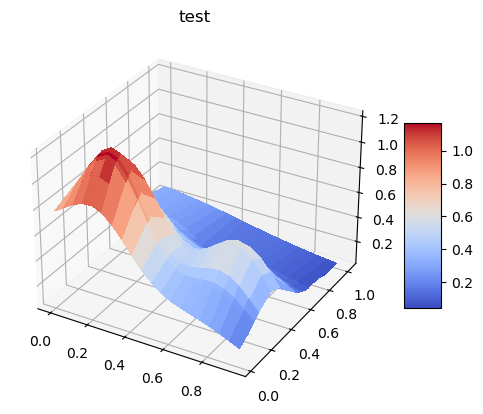

In [17]:
def CreateFeatureMatrix(x, y, z, degree):
    poly = PolynomialFeatures(degree, include_bias=True)
    poly_features = poly.fit_transform(x.reshape(-1, 1))
    poly.fit(poly_features, y)

    return poly_features

# def create_feature_matrix(x, y, z, degree):
#     # Stack x, y, and z into a feature matrix
#     X = np.vstack((x.ravel(), y.ravel(), z.ravel())).T
    
#     # Create polynomial features
#     poly = PolynomialFeatures(degree, include_bias=True)
#     poly_features = poly.fit_transform(X)

#     return poly_features

def create_feature_matrix(x, y, degree):
    # Stack x and y into a feature matrix
    X = np.vstack((x.ravel(), y.ravel())).T
    
    # Create polynomial features
    poly = PolynomialFeatures(degree, include_bias=True)
    poly_features = poly.fit_transform(X)
    
    return poly_features

#Scaling
#TODO: When working with real data - look at what sort of scaling makes the most sense (or just discuss that something should have been done differently)
z_scaled = z - z.mean()
x_scaled = x - x.mean()
y_scaled = y - y.mean()

#plot_3d(x_scaled, y_scaled, z_scaled, "Franke's Function w/ mean centering")

#Plot (code taken from project description)
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

surf = ax.plot_surface(x, y, z, cmap=cm.coolwarm, linewidth=0, antialiased=False)

#ax.set_zlim(-0.10, 1.40)
#ax.zaxis.set_major_locator(LinearLocator(10))
#ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

fig.colorbar(surf, shrink=0.5, aspect=5)

plt.title("test")
plt.show()

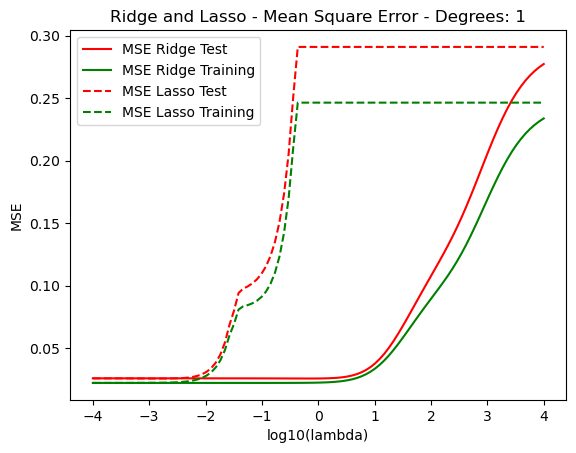

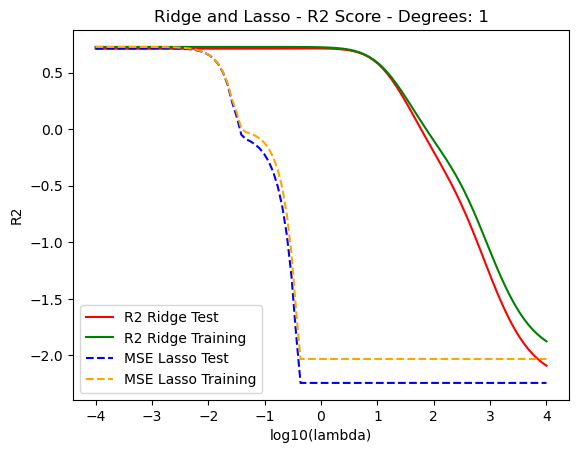

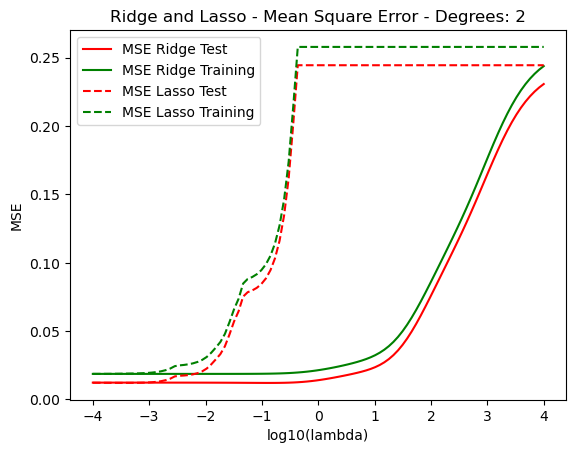

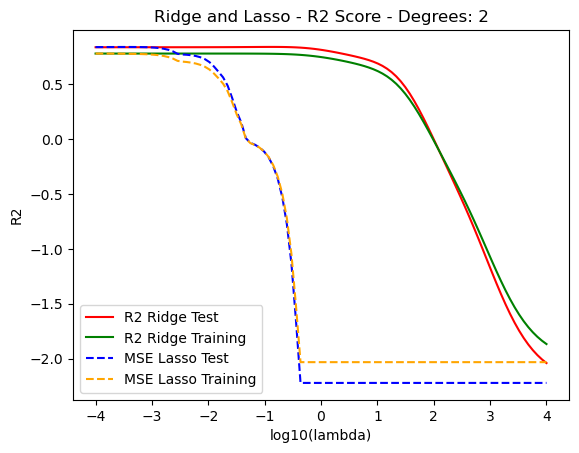

/opt/miniconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.058e+00, tolerance: 8.408e-03
  model = cd_fast.enet_coordinate_descent(
/opt/miniconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.008e+00, tolerance: 8.408e-03
  model = cd_fast.enet_coordinate_descent(
/opt/miniconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.535e-01, to

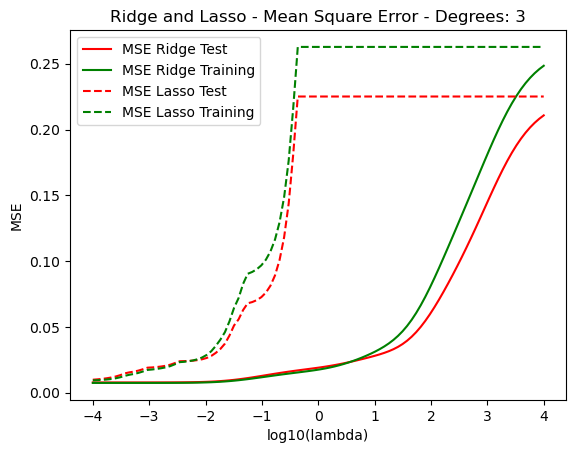

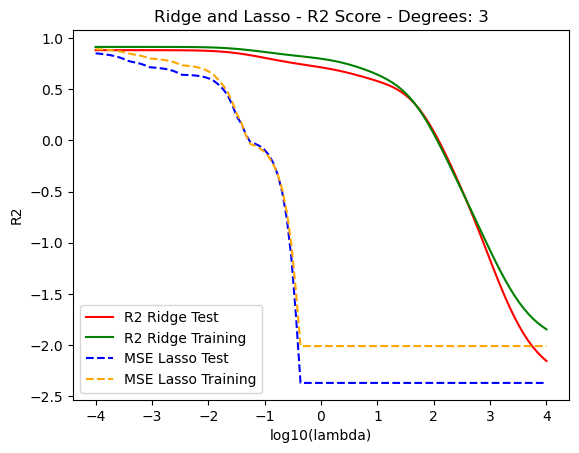

/opt/miniconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.467e-01, tolerance: 8.177e-03
  model = cd_fast.enet_coordinate_descent(
/opt/miniconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.784e-01, tolerance: 8.177e-03
  model = cd_fast.enet_coordinate_descent(
/opt/miniconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.907e-01, to

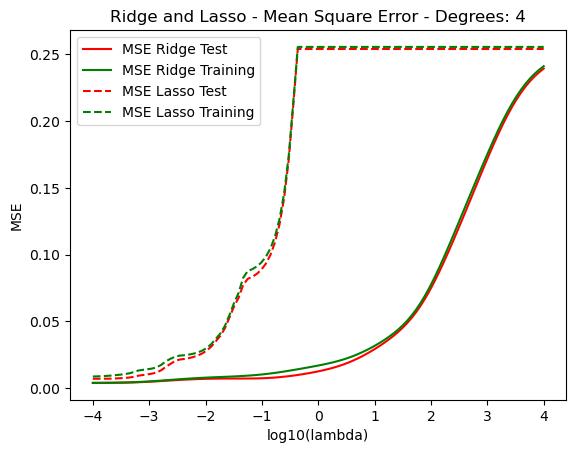

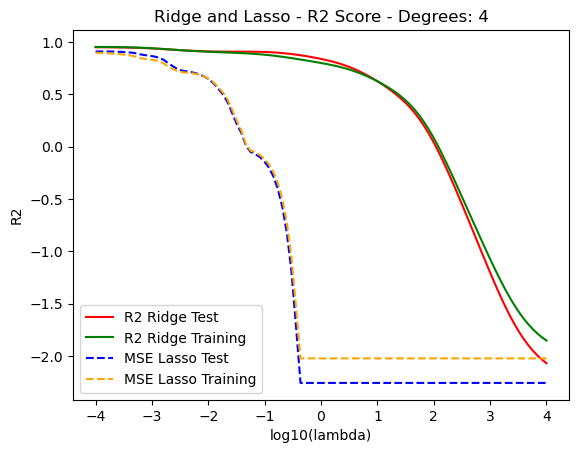

/opt/miniconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.162e-01, tolerance: 8.202e-03
  model = cd_fast.enet_coordinate_descent(
/opt/miniconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.757e-01, tolerance: 8.202e-03
  model = cd_fast.enet_coordinate_descent(
/opt/miniconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.801e-01, to

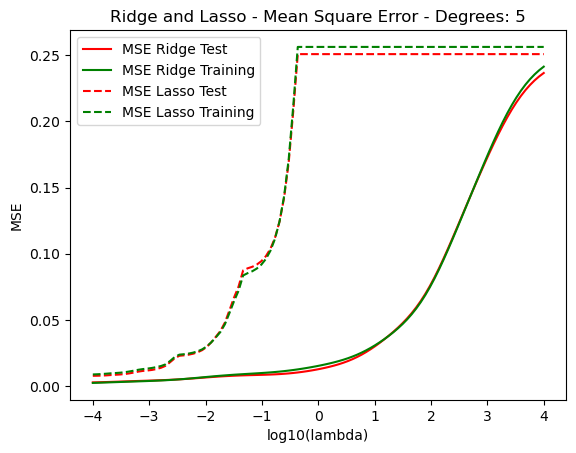

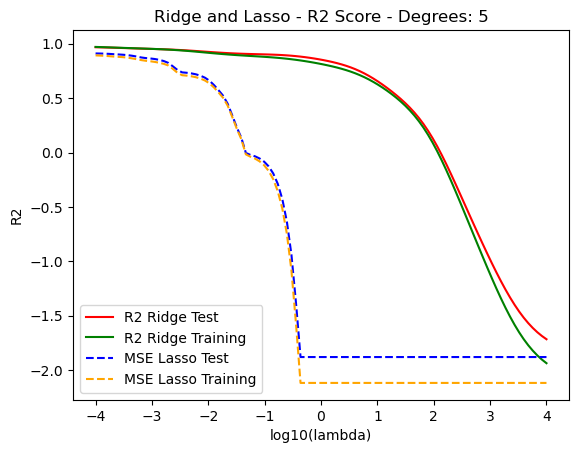

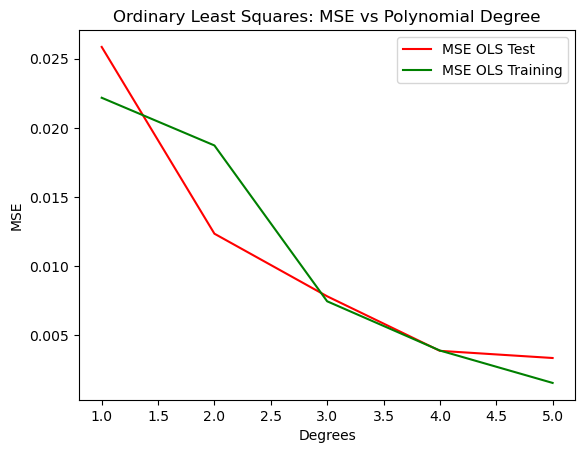

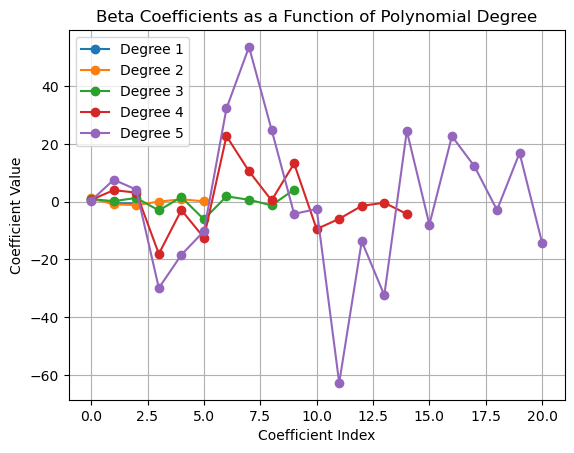

In [19]:
def MSE(z_data, z_model):
    n = np.size(z_model)  # Number of data points
    return np.sum((z_data - z_model)**2)/n

# Ridge Regression using matrix inversion
def Beta_ridge_regression(X, z, lmb): 
    I = np.identity(X.shape[1])

    return np.linalg.pinv(X.T.dot(X) + lmb*I) @ X.T.dot(z)

def Calculate_y_ridge(X, beta):
    return X.dot(beta)


#Polynomials up to 5th order
train_MSEs = []
test_MSEs = []
train_r2s = []
test_r2s = []
betas = []
degrees = range(1,6)
for order in degrees:
    #feature_matrix = create_feature_matrix(x, y, z, order)
    feature_matrix = create_feature_matrix(x, y, order)

    z = z.ravel() # Flatten z into a 1D array for regression (from ChatGPT)
    X_train, X_test, z_train, z_test = train_test_split(feature_matrix, z, test_size=0.2)

    beta = np.linalg.pinv(X_train.T.dot(X_train)).dot(X_train.T).dot(z_train) #Pseudo inverse to handle singular matrices
    betas.append(beta)

    #Make the prediction
    z_tilde = X_train @ beta
    z_predict = X_test @ beta

    #OLS
    training_mse = MSE(z_train, z_tilde)
    test_mse = MSE(z_test, z_predict)

    train_MSEs.append(training_mse)
    test_MSEs.append(test_mse)

    # print(training_mse)
    # print(test_mse)
    # print(f"Max difference in training set: {np.max(np.abs(z_train - z_tilde))}")
    # print(f"Max difference in test set: {np.max(np.abs(z_test - z_predict))}")

    #R2
    r2_training = error.r2_score(z_train, z_tilde)
    r2_test = error.r2_score(z_test, z_predict)
    # print(f"r2 training: {r2_training}")
    # print(f"r2 test: {r2_test}")

    train_r2s.append(r2_training)
    test_r2s.append(r2_test)

    # #For testing - plotting the fitted line over the data points:
    # Simple_test_data.Create_test_plot(order)

    training_ridge_mses = []
    test_ridge_mses = []
    training_ridge_r2s = []
    test_ridge_r2s = []
    betas_ridge = []

    training_lasso_mses = []
    test_lasso_mses = []
    training_lasso_r2s = []
    test_lasso_r2s = []

    lambdas = (0.0001, 0.001, 0.01, 0.1, 1.0)
    nlambdas = 100
    lambdas = np.logspace(-4, 4, nlambdas)
    for i in range(nlambdas):
        lmb = lambdas[i]

        #Ridge
        beta_hat_ridge = Beta_ridge_regression(X_train, z_train, lmb)
        betas_ridge.append(beta_hat_ridge)
        z_tilde_ridge = Calculate_y_ridge(X_train, beta_hat_ridge)
        z_predict_ridge = Calculate_y_ridge(X_test, beta_hat_ridge)

        training_ridge_mses.append(error.mean_squared_error(z_train, z_tilde_ridge))
        test_ridge_mses.append(error.mean_squared_error(z_test, z_predict_ridge))

        training_ridge_r2s.append(error.r2_score(z_train, z_tilde_ridge))
        test_ridge_r2s.append(error.r2_score(z_test, z_predict_ridge))

        #Lasso
        RegLasso = linear_model.Lasso(lmb, fit_intercept=False)
        RegLasso.fit(X_train, z_train)
        y_tilde_lasso = RegLasso.predict(X_train)
        y_predict_lasso = RegLasso.predict(X_test)

        training_lasso_mses.append(error.mean_squared_error(z_train, y_tilde_lasso))
        test_lasso_mses.append(error.mean_squared_error(z_test, y_predict_lasso))

        training_lasso_r2s.append(error.r2_score(z_train, y_tilde_lasso))
        test_lasso_r2s.append(error.r2_score(z_test, y_predict_lasso))

    # MSE plots
    plt.figure()
    plt.title("Ridge and Lasso - Mean Square Error - Degrees: " + str(order))

    plt.plot(np.log10(lambdas), test_ridge_mses, 'r', label = 'MSE Ridge Test')
    plt.plot(np.log10(lambdas), training_ridge_mses, 'g', label = 'MSE Ridge Training')

    #TODO: Easier to read with same colour for the test and training, or not?
    plt.plot(np.log10(lambdas), test_lasso_mses, 'r--', label = 'MSE Lasso Test')
    plt.plot(np.log10(lambdas), training_lasso_mses, 'g--', label = 'MSE Lasso Training')

    plt.xlabel('log10(lambda)')
    plt.ylabel('MSE')
    plt.legend()
    plt.show()

    # R2 Ridge plots
    plt.figure()
    plt.title("Ridge and Lasso - R2 Score - Degrees: " + str(order))

    plt.plot(np.log10(lambdas), test_ridge_r2s, 'r', label = 'R2 Ridge Test')
    plt.plot(np.log10(lambdas), training_ridge_r2s, 'g', label = 'R2 Ridge Training')

    plt.plot(np.log10(lambdas), test_lasso_r2s, 'b--', label = 'MSE Lasso Test')
    plt.plot(np.log10(lambdas), training_lasso_r2s, '--', color='orange', label = 'MSE Lasso Training')

    plt.xlabel('log10(lambda)')
    plt.ylabel('R2')
    plt.legend()
    plt.show()


# #TODO: Make labels and title better
# #Plot the mse vs. degrees
plt.figure()
plt.title("Ordinary Least Squares: MSE vs Polynomial Degree")
plt.plot(degrees, test_MSEs, 'r', label = 'MSE OLS Test')
plt.plot(degrees, train_MSEs, 'g', label = 'MSE OLS Training')

plt.xlabel('Degrees')
plt.ylabel('MSE')
plt.legend()
plt.show()

# #Plot the r2 scores vs. degrees
# plt.figure()
# plt.title("R2 vs Polynomial Degree")
# plt.plot(degrees, test_r2s, 'r', label = 'R2 Test')
# plt.plot(degrees, train_r2s, 'g', label = 'R2 Training')

# plt.xlabel('Degrees')
# plt.ylabel('R2-Score')
# plt.legend()
# plt.show()

# #From ChatGPT:
# #Plot beta vs degrees
for i in range(len(betas)):
    plt.plot(betas[i], marker='o', label=f'Degree {degrees[i]}')

# Adding plot details
plt.title('Beta Coefficients as a Function of Polynomial Degree')
plt.xlabel('Coefficient Index')
plt.ylabel('Coefficient Value')
plt.legend()
plt.grid(True)
plt.show()





# e) Bootstrap


In [24]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.utils import resample

np.random.seed(2018)

# def frankes_function(x, y):
#     z = ((3/4)*np.exp((-1/4)*(9*x-2)**2-(1/4)*(9*y-2)**2)
#         + ((3/4)*np.exp((-1/49)*(9*x+1)**2-(1/10)*(9*y+1)))
#         + ((1/2)*np.exp((-1/4)*(9*x-7)**2-(1/4)*(9*y-3)**2))
#         - ((1/5)*np.exp(-(9*x-4)**2-(9*y-7)**2)))
#     return z

# def create_feature_matrix(x, y, degree):
#     # Stack x and y into a feature matrix
#     X = np.vstack((x.ravel(), y.ravel())).T
    
#     # Create polynomial features
#     poly = PolynomialFeatures(degree, include_bias=True)
#     poly_features = poly.fit_transform(X)
    
#     return poly_features

# #Make data
# x = np.arange(0, 1, 0.05)
# y = np.arange(0, 1, 0.05) + np.random.normal(0, 0.1, x.shape)

# x, y = np.meshgrid(x, y)
# z = frankes_function(x, y)

# z = z.ravel() # Flatten z into a 1D array for regression (from ChatGPT)
# #X = np.vstack((x.ravel(), y.ravel(), z.ravel())).T

n = 500
n_bootstraps = 100
degree = 2  # A quite high value, just to show.
noise = 0.1
max_degrees = 14

feature_matrix = create_feature_matrix(x, y, degree)

z = z.ravel() # Flatten z into a 1D array for regression (from ChatGPT)
X_train, X_test, z_train, z_test = train_test_split(feature_matrix, z, test_size=0.2)

beta = np.linalg.pinv(X_train.T.dot(X_train)).dot(X_train.T).dot(z_train) #Pseudo inverse to handle singular matrices

#Make the prediction
z_tilde = X_train @ beta
z_predict = X_test @ beta

# Combine x transformation and model into one operation.
# Not necessary, but convenient.
model = make_pipeline(PolynomialFeatures(degree=degree), LinearRegression(fit_intercept=False))

# The following (m x n_bootstraps) matrix holds the column vectors z_pred
# for each bootstrap iteration.
z_pred = np.empty((z_test.shape[0], n_bootstraps))  # Adjust for 3D case

# Perform bootstrapping
for i in range(n_bootstraps):
    # Resample the training data
    X_resampled, z_resampled = resample(X_train, z_train)
    model.fit(X_resampled, z_resampled)
    # Fit the model on resampled data and evaluate on the same test data
    z_pred[:, i] = model.fit(X_resampled, z_resampled).predict(X_test).ravel()  # Prediction in 3D

# Reshape z_test to match the dimensions of z_pred for broadcasting
z_test_reshaped = z_test.reshape(-1, 1)  # Reshape to (80, 1)
# Error calculation (mean squared error across all bootstrap samples and test points)
error = np.mean(np.mean((z_test_reshaped - z_pred)**2, axis=1, keepdims=True))
# Bias^2 calculation (bias as the difference between true values and the mean prediction)
bias = np.mean((z_test_reshaped - np.mean(z_pred, axis=1, keepdims=True))**2)
# Variance calculation (variance of predictions across bootstrap samples)
variance = np.mean(np.var(z_pred, axis=1,keepdims=True))

# Note: Expectations and variances taken w.r.t. different training
# data sets, hence the axis=1. Subsequent means are taken across the test data
# set in order to obtain a total value, but before this we have error/bias/variance
# calculated per data point in the test set.
# Note 2: The use of keepdims=True is important in the calculation of bias as this 
# maintains the column vector form. Dropping this yields very unexpected results.
# error = np.mean( np.mean((z_test - z_pred)**2, axis=1, keepdims=True) )
# bias = np.mean( (z_test - np.mean(z_pred, axis=1, keepdims=True))**2 )
# variance = np.mean( np.var(z_pred, axis=1, keepdims=True) )
print('Error:', error)
print('Bias^2:', bias)
print('Var:', variance)
print('{} >= {} + {} = {}'.format(error, bias, variance, bias+variance))




plt.plot(polydegree, error, label='Error')
plt.plot(polydegree, bias, label='bias')
plt.plot(polydegree, variance, label='Variance')
plt.legend()
plt.show()



Error: 0.003980128071948271
Bias^2: 0.003752188766905361
Var: 0.00022793930504291126
0.003980128071948271 >= 0.003752188766905361 + 0.00022793930504291126 = 0.003980128071948272


In [26]:
#From lecture notes:

# import matplotlib.pyplot as plt
# import numpy as np
# from sklearn.linear_model import LinearRegression, Ridge, Lasso
# from sklearn.preprocessing import PolynomialFeatures
# from sklearn.model_selection import train_test_split
# from sklearn.pipeline import make_pipeline
# from sklearn.utils import resample

# np.random.seed(2018)

# n = 40
n_boostraps = 100
maxdegree = 14


# # Make data set.
# x = np.linspace(-3, 3, n).reshape(-1, 1)
# y = np.exp(-x**2) + 1.5 * np.exp(-(x-2)**2)+ np.random.normal(0, 0.1, x.shape)
# error = np.zeros(maxdegree)
# bias = np.zeros(maxdegree)
# variance = np.zeros(maxdegree)
polydegree = np.zeros(maxdegree)
# x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

for degree in range(maxdegree):
    model = make_pipeline(PolynomialFeatures(degree=degree), LinearRegression(fit_intercept=False))
    y_pred = np.empty((y_test.shape[0], n_boostraps))
    for i in range(n_boostraps):
        x_, y_ = resample(x_train, y_train)
        y_pred[:, i] = model.fit(x_, y_).predict(x_test).ravel()

    polydegree[degree] = degree
    error[degree] = np.mean( np.mean((y_test - y_pred)**2, axis=1, keepdims=True) )
    bias[degree] = np.mean( (y_test - np.mean(y_pred, axis=1, keepdims=True))**2 )
    variance[degree] = np.mean( np.var(y_pred, axis=1, keepdims=True) )
    print('Polynomial degree:', degree)
    print('Error:', error[degree])
    print('Bias^2:', bias[degree])
    print('Var:', variance[degree])
    print('{} >= {} + {} = {}'.format(error[degree], bias[degree], variance[degree], bias[degree]+variance[degree]))

plt.plot(polydegree, error, label='Error')
plt.plot(polydegree, bias, label='bias')
plt.plot(polydegree, variance, label='Variance')
plt.legend()
plt.show()

ValueError: Expected 2D array, got 1D array instead:
array=[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

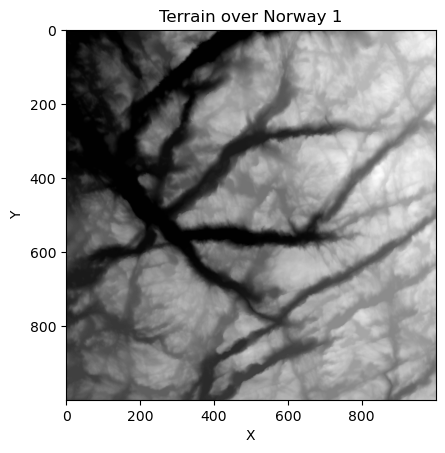

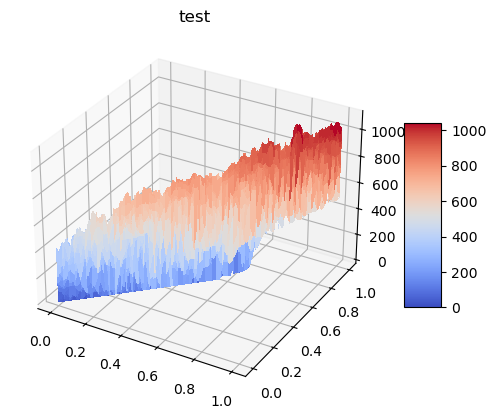

In [27]:
# Load the terrain - again from project description
terrain = imread('SRTM_data_Norway_2.tif')

N = 1000
m = 5 # polynomial order
terrain = terrain[:N,:N]
# Creates mesh of image pixels
x = np.linspace(0,1, np.shape(terrain)[0])
y = np.linspace(0,1, np.shape(terrain)[1])
x_mesh, y_mesh = np.meshgrid(x,y)

z = terrain
#X = create_X(x_mesh, y_mesh,m)


# Show the terrain
plt.figure()
plt.title('Terrain over Norway 1')
plt.imshow(terrain, cmap='gray')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()
